In [1]:
import numpy as np
import cv2 as cv #opencv - for reading in images
# import os
import data_processing as dp
import storage as tst
import scipy.interpolate as intp
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
%matplotlib inline

In [2]:
# constants
c = 2.99e8 # speed of light in vac [m/s]
# factors for plotting, b/c im working in m and sec
h2th = 1.e-15 # Hz to THz
m2nm = 1.e9 # m to nm
s2fs = 1.e15 # s to fs

# Raw PHAROS pre-processing

In [3]:
# loading info
folder = './Raw PHAROS/' 
fname = 'raw_pharos.tif'
cali = {
    'calibration wavelength': 638.453e-9,
    'calibration pixel': 1025,
    'delay per pixel': .1e-15,
    'wavelength per pixel': .414e-9
}

In [4]:
# load in trace
(trace,d_arr,w_arr,f_arr) = tst.read_trace(folder,fname,cali)

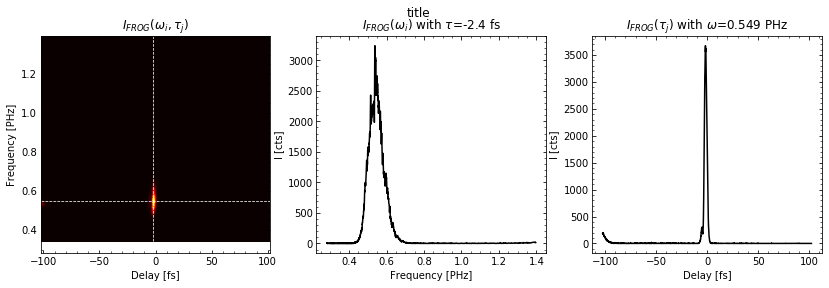

In [16]:
# plot after every step
tst.rough_plot(trace,d_arr,f_arr,chose_f=.55/h2th,chose_d=-2.3/s2fs)

In [6]:
# make note of any weird values here
print(trace[492,157])

4095


In [5]:
# bkgnd removal
bnd_val = (10./s2fs,-20./s2fs,.4/h2th,.8/h2th)
trace = tst.avg_removal(trace,d_arr,f_arr,bnd_val,copy=False)

In [6]:
# do any other weird corrections here i guess
if (trace[492,157]>1000):
    print('mischief managed')
    trace[492,157] = 40 # number picked from nearby values after avg_removal was run
assert(trace.dtype==np.ushort)

mischief managed


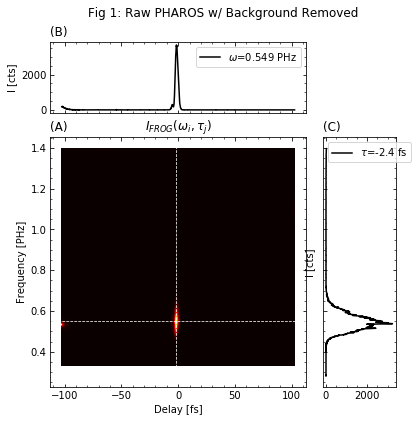

In [18]:
tst.nice_plot(trace,d_arr,-2.3/s2fs,f_arr,.55/h2th,fname='rp_bkg-rem_2048.png',title='Raw PHAROS w/ Background Removed')

In [9]:
# tst.rough_plot(trace,d_arr,f_arr,chose_f=.55/h2th,chose_d=-2.3/s2fs)
# # may also want contour before and after avg_removal

In [8]:
# sampling testing
N = 128
dt,df,M,*_ = tst.sr_FWHM(trace,d_arr,f_arr,N,diag=True)
print(dt*N/2*s2fs)
print(df*N/2*h2th)

max along t_curve: -1.6508060576453316
max along f_curve: 0.5383452600683419
time indices:  [ 994 1024]  time vals:  [-2.95144113  0.05002443]
freq indices:  [904 736 730 727]  freq vals:  [0.50803526 0.57615691 0.57892933 0.58032557]
Dt =  3.001465559355154 Df =  0.07043534386379019
M =  5.201959738633938 dt =  0.57698746437114 df =  0.013540155518828928
36.92719771975296
0.8665699532050514


In [12]:
mid_d = 0.
mid_f = .9/h2th
# save params below
folder = './Raw_PHAROS_output/'
fname = '128-bit-test'

In [13]:
# (f_trace,fd_arr,ff_arr) = tst.man_snc(trace,d_arr,mid_d,f_arr,mid_f,N,dt,df,pad_trace=True,save=False,folder=folder,fname=fname) 

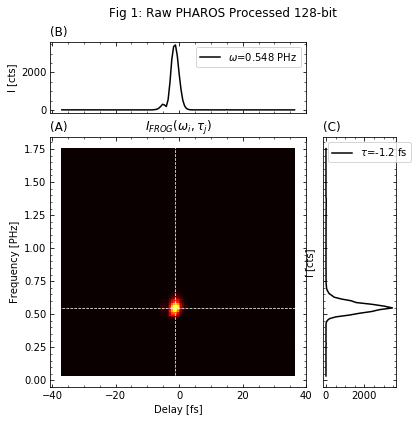

In [17]:
tst.nice_plot(f_trace,fd_arr,-1./s2fs,ff_arr,.56/h2th,title='Raw PHAROS Processed 128-bit',fname='rp_proc_128.png')

# First Stage Pre-Processing

In [35]:
fold1 = './First Stage/'
fn1 = '2um_Merge_9.tif'
# same cali as raw pharos, only b/c its the same size

In [36]:
(t1,d1,w1,f1) = tst.read_trace(fold1,fn1,cali)

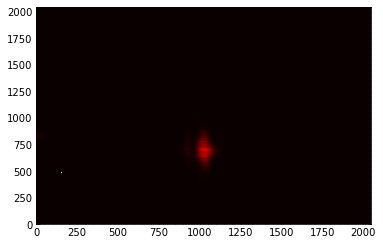

In [39]:
plt.pcolormesh(t1,cmap='hot');

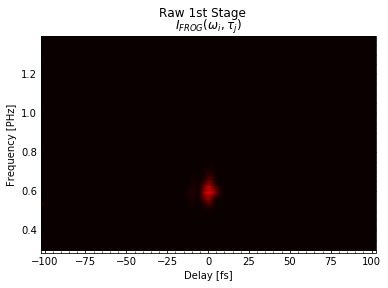

In [40]:
tst.rough_plot(t1,d1,f1,title='Raw 1st Stage')

# Second Stage Pre-Processing

In [20]:
fold2 = './Second Stage/'
fn2 = 'final.png'
c2 = {
    'calibration wavelength': 527.e-9,
    'calibration pixel': 1143,
    'delay per pixel': .17e-15,
    'wavelength per pixel': .09e-9
}

In [21]:
(t2,d2,w2,f2) = tst.read_trace(fold2,fn2,c2)

In [23]:
print(t2.shape,d2.shape,w2.shape)

(2138, 1542) (1542,) (2138,)


In [26]:
w2*m2nm

array([424.13      , 424.22004212, 424.31008423, ..., 616.36991577,
       616.45995788, 616.55      ])

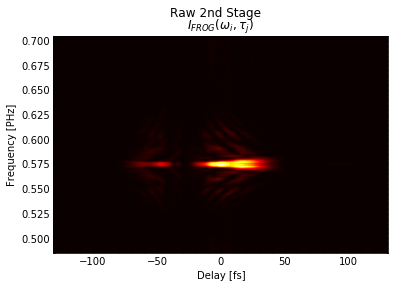

In [33]:
tst.rough_plot(t2,d2,f2,title='Raw 2nd Stage')

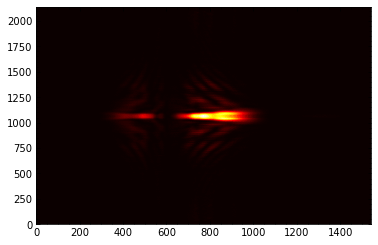

In [34]:
plt.pcolormesh(t2,cmap='hot');